# Chapter 3. Visualizing Data

## matplotlib

In [36]:
from matplotlib import pyplot as plt

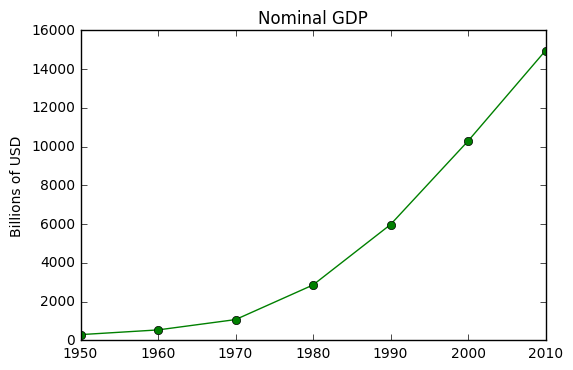

In [37]:
# Example 3-1

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# Create a line chart with years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# Add a title
plt.title("Nominal GDP")

# Add a label to the y-axis
plt.ylabel("Billions of USD")
plt.show()

## Bar Charts

A bar chart is a good choice when you want to show how some quantity varies among a <em>discrete</em> set of items.

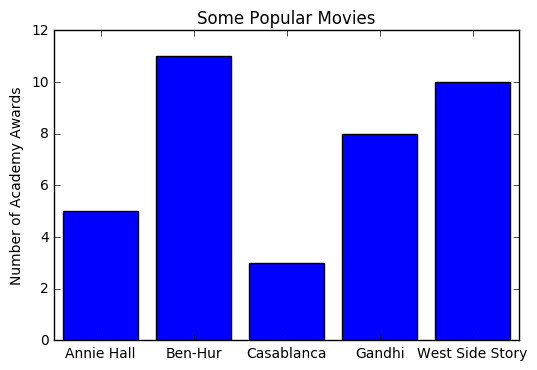

In [38]:
# Example 3-2

# Let's look at how many Academy Awards were won by each of a variety of movies:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)

plt.ylabel("Number of Academy Awards")
plt.title("Some Popular Movies")

# label x-axis with movie names at the center of each bar
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)

plt.show()

A bar chart can also be a good choice for plotting histograms of bucketed numeric values in order to visually explore how the values are distributed.

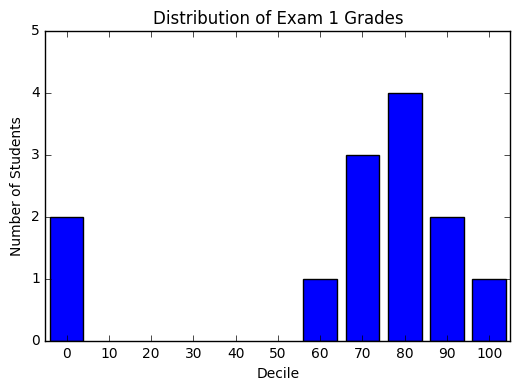

In [39]:
# Example 3-3

from collections import Counter

grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

# shift each bar to the left by 4
plt.bar([x - 4 for x in histogram.keys()],
       # give each bar its correct height
       histogram.values(),
       # give each bar a width of 8
       8)

# x-axis from -5 to 105, y-axis from 0 to 5
plt.axis([-5, 105, 0, 5])

# x-axis labels at 0, 10, ..., 100
plt.xticks([10 * i for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("Number of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()


Be judicious when using plt.axis().  
When creating bar charts it is considered especially bad form for your y-axis to <em>not</em> start at 0.  
This is an easy way to mislead people, as shown in the examples below.

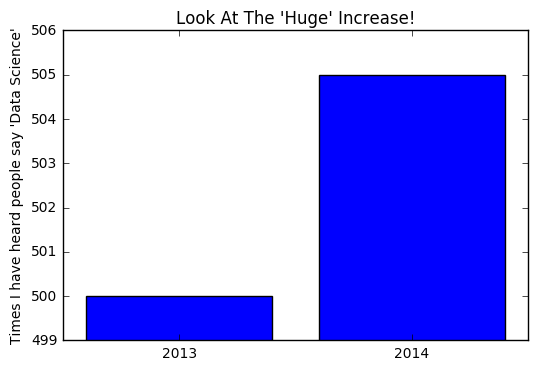

In [40]:
# Figure 3-4
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("Times I have heard people say 'Data Science'")

# if you don't include the following code, matplotlib will label the x-axis 0,1 and add a +2.013e3 in the corner:
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2012.5, 2014.5,499,506])
plt.title("Look At The 'Huge' Increase!")
plt.show()

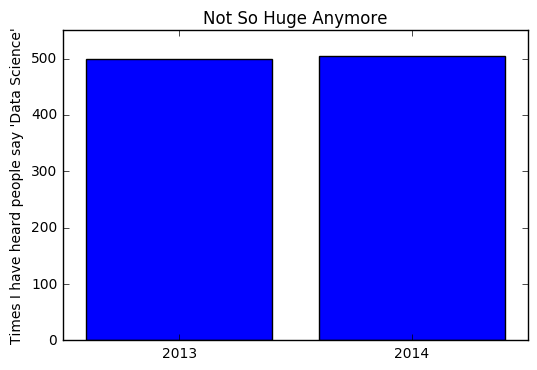

In [41]:
# Figure 3-5
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("Times I have heard people say 'Data Science'")

# if you don't include the following code, matplotlib will label the x-axis 0,1 and add a +2.013e3 in the corner:
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2012.5, 2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

## Line Charts

Line charts are a good choice for showing trends.

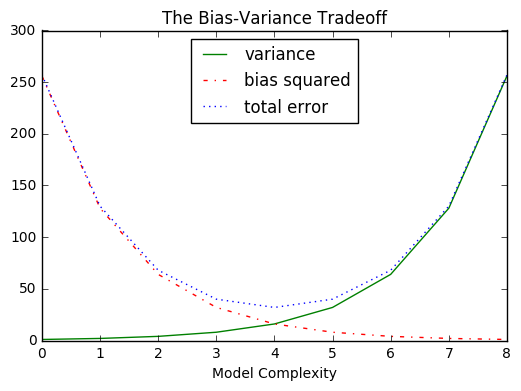

In [42]:
# Figure 3-6

variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# we can make multiple calls to plt.plot() to show multiple series on the same chart:
plt.plot(xs, variance, 'g-', label='variance')  # solid green line
plt.plot(xs, bias_squared, 'r-.', label='bias squared')  # dot-dash red line
plt.plot(xs, total_error, 'b:', label='total error')  # dotted blue line

# since we have assigned labels to each series, we get a legend thrown in for free
# loc=9 means top-center (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend)
plt.legend(loc=9)
plt.xlabel("Model Complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

## Scatterplots

A scatterplot is the right choice for visualizing the relationship between two paired sets of data.  
The following example illustrates the relationship between the number of friends your users have and the number of minutes they spend on the site every day.

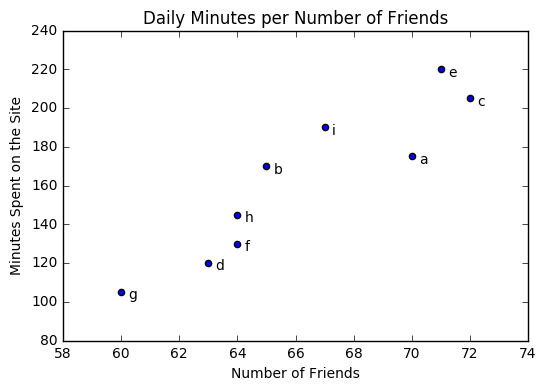

In [46]:
# Figure 3-7

friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')

plt.title("Daily Minutes per Number of Friends")
plt.xlabel("Number of Friends")
plt.ylabel("Minutes Spent on the Site")
plt.show()

If you're scattering comparable variables, you might get a misleading picture if you let matplotlib choose the scale.

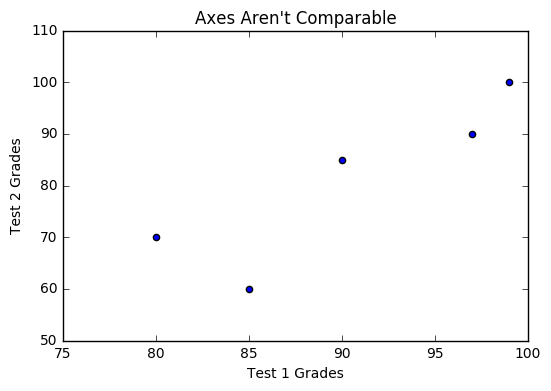

In [51]:
# Figure 3-8

test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("Test 1 Grades")
plt.ylabel("Test 2 Grades")
plt.show()

If we include a call to <code>plt.axis("equal")</code>, the plot more accurately shows that most of the variation occurs on test 2.

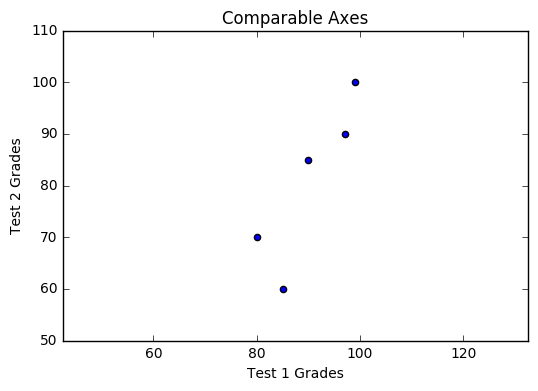

In [49]:
# Figure 3-9

test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Comparable Axes")
plt.xlabel("Test 1 Grades")
plt.ylabel("Test 2 Grades")
plt.axis("equal")
plt.show()

## For Further Exploration

### A few more visualization tools:  

[seaborn](http://seaborn.pydata.org/)  
[D3.js](https://d3js.org/)  
[Bokeh](http://bokeh.pydata.org/en/latest/)  
[ggplot](https://pypi.python.org/pypi/ggplot)  